In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_raw = pd.read_csv('APC_SL_176_mfl.csv', delimiter=';')
df_raw

CalendarDateKey DepartureLineTransportMode            ContractName  \
0             20221031                      TRAIN  Pendeltågsverksamheten   
1             20221031                      TRAIN  Pendeltågsverksamheten   
2             20221031                      TRAIN  Pendeltågsverksamheten   
3             20221031                      TRAIN  Pendeltågsverksamheten   
4             20221031                      TRAIN  Pendeltågsverksamheten   
...                ...                        ...                     ...   
21148         20221101                       TRAM            Roslagsbanan   
21149         20221101                       TRAM            Roslagsbanan   
21150         20221101                       TRAM            Roslagsbanan   
21151         20221101                       TRAM            Roslagsbanan   
21152         20221101                       TRAM            Roslagsbanan   

       DepartureLineNumber DepartureJourneyPatternStartPointName  \
0                       40                             Uppsala C   
1                       40                             Uppsala C   
2                       40                             Uppsala C   
3                       40                             Uppsala C   
4                       40                             Uppsala C   
...                    ...                                   ...   
21148                   28                             Österskär   
21149                   28                             Österskär   
21150                   28                             Österskär   
21151                   28                             Österskär   
21152                   28                             Österskär   

      DepartureJourneyPatternEndPointName TripDepTime  \
0                          Stockholm City    00:26:00   
1                          Stockholm City    00:26:00   
2                          Stockholm City    00:26:00   
3                          Stockholm City    00:26:00   
4                          Stockholm City    00:26:00   
...                                   ...         ...   
21148                    Stockholms östra    23:55:00   
21149                    Stockholms östra    23:55:00   
21150                    Stockholms östra    23:55:00   
21151                    Stockholms östra    23:55:00   
21152                    Stockholms östra    23:55:00   

       StopPointSequenceNumber     StopPointName  CarOrderPos  ...  \
0                            1         Uppsala C            1  ...   
1                            2           Knivsta            1  ...   
2                            3   Arlanda central            1  ...   
3                            4    Upplands Väsby            1  ...   
4                            5           Rotebro            1  ...   
...                        ...               ...          ...  ...   
21148                       19     Universitetet            2  ...   
21149                       19     Universitetet            3  ...   
21150                       20  Stockholms östra            1  ...   
21151                       20  Stockholms östra            2  ...   
21152                       20  Stockholms östra            3  ...   

      avgAlightingsImp avgCurrentLoadImp  BoardingsApc AlightingsApc  \
0                  0,0              18,0           NaN           NaN   
1                  9,0               9,0           NaN           NaN   
2                  0,0              42,0           NaN           NaN   
3                  3,0              45,0           NaN           NaN   
4                  0,0              50,0           NaN           NaN   
...                ...               ...           ...           ...   
21148              0,0               2,0           0.0           0.0   
21149              0,0               3,0           NaN           NaN   
21150              2,0               0,0           NaN           NaN   
21151              

In [11]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21153 entries, 0 to 21152
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CalendarDateKey                        21153 non-null  int64  
 1   DepartureLineTransportMode             21153 non-null  object 
 2   ContractName                           21153 non-null  object 
 3   DepartureLineNumber                    21153 non-null  int64  
 4   DepartureJourneyPatternStartPointName  21153 non-null  object 
 5   DepartureJourneyPatternEndPointName    21153 non-null  object 
 6   TripDepTime                            21153 non-null  object 
 7   StopPointSequenceNumber                21153 non-null  int64  
 8   StopPointName                          21153 non-null  object 
 9   CarOrderPos                            21153 non-null  int64  
 10  DepTime                                21153 non-null  object 
 11  Ar

In [12]:
# replace decimals with . and make float
df['Boardings_nmb'] = df['Boardings'].str.replace(',','.')
df['Boardings_nmb'] = df['Boardings_nmb'].astype('float16').round(0)
df


CalendarDateKey DepartureLineTransportMode            ContractName  \
0             20221031                      TRAIN  Pendeltågsverksamheten   
1             20221031                      TRAIN  Pendeltågsverksamheten   
2             20221031                      TRAIN  Pendeltågsverksamheten   
3             20221031                      TRAIN  Pendeltågsverksamheten   
4             20221031                      TRAIN  Pendeltågsverksamheten   
...                ...                        ...                     ...   
21148         20221101                       TRAM            Roslagsbanan   
21149         20221101                       TRAM            Roslagsbanan   
21150         20221101                       TRAM            Roslagsbanan   
21151         20221101                       TRAM            Roslagsbanan   
21152         20221101                       TRAM            Roslagsbanan   

       DepartureLineNumber DepartureJourneyPatternStartPointName  \
0                       40                             Uppsala C   
1                       40                             Uppsala C   
2                       40                             Uppsala C   
3                       40                             Uppsala C   
4                       40                             Uppsala C   
...                    ...                                   ...   
21148                   28                             Österskär   
21149                   28                             Österskär   
21150                   28                             Österskär   
21151                   28                             Österskär   
21152                   28                             Österskär   

      DepartureJourneyPatternEndPointName TripDepTime  \
0                          Stockholm City    00:26:00   
1                          Stockholm City    00:26:00   
2                          Stockholm City    00:26:00   
3                          Stockholm City    00:26:00   
4                          Stockholm City    00:26:00   
...                                   ...         ...   
21148                    Stockholms östra    23:55:00   
21149                    Stockholms östra    23:55:00   
21150                    Stockholms östra    23:55:00   
21151                    Stockholms östra    23:55:00   
21152                    Stockholms östra    23:55:00   

       StopPointSequenceNumber     StopPointName  CarOrderPos  ...  \
0                            1         Uppsala C            1  ...   
1                            2           Knivsta            1  ...   
2                            3   Arlanda central            1  ...   
3                            4    Upplands Väsby            1  ...   
4                            5           Rotebro            1  ...   
...                        ...               ...          ...  ...   
21148                       19     Universitetet            2  ...   
21149                       19     Universitetet            3  ...   
21150                       20  Stockholms östra            1  ...   
21151                       20  Stockholms östra            2  ...   
21152                       20  Stockholms östra            3  ...   

      avgCurrentLoadImp BoardingsApc  AlightingsApc CurrentLoadApc  \
0                  18,0          NaN            NaN            NaN   
1                   9,0          NaN            NaN            NaN   
2                  42,0          NaN            NaN            NaN   
3                  45,0          NaN            NaN            NaN   
4                  50,0          NaN            NaN            NaN   
...                 ...          ...            ...            ...   
21148               2,0          0.0            0.0            3.0   
21149               3,0          NaN            NaN            NaN   
21150               0,0          NaN            NaN            NaN   
21151               0,0          0.0   

In [13]:
df['Boardings_nmb'].max()

310.0

In [14]:
cols = ['CalendarDateKey','DepartureLineTransportMode', 'DepartureLineNumber','StopPointName', 'TripDepTime', 'Boardings','Boardings_nmb','Alightings','CentroidEastingCoordinate', 'CentroidNorthingCoordinate']

df_apc = df[cols]
df_apc

CalendarDateKey DepartureLineTransportMode  DepartureLineNumber  \
0             20221031                      TRAIN                   40   
1             20221031                      TRAIN                   40   
2             20221031                      TRAIN                   40   
3             20221031                      TRAIN                   40   
4             20221031                      TRAIN                   40   
...                ...                        ...                  ...   
21148         20221101                       TRAM                   28   
21149         20221101                       TRAM                   28   
21150         20221101                       TRAM                   28   
21151         20221101                       TRAM                   28   
21152         20221101                       TRAM                   28   

          StopPointName TripDepTime Boardings  Boardings_nmb Alightings  \
0             Uppsala C    00:26:00      18,0           18.0        0,0   
1               Knivsta    00:26:00       0,0            0.0        9,0   
2       Arlanda central    00:26:00      33,0           33.0        0,0   
3        Upplands Väsby    00:26:00       6,0            6.0        3,0   
4               Rotebro    00:26:00       5,0            5.0        0,0   
...                 ...         ...       ...            ...        ...   
21148     Universitetet    23:55:00       0,0            0.0        0,0   
21149     Universitetet    23:55:00       0,0            0.0        0,0   
21150  Stockholms östra    23:55:00       0,0            0.0        2,0   
21151  Stockholms östra    23:55:00       0,0            0.0        3,0   
21152  Stockholms östra    23:55:00       0,0            0.0        3,0   

       CentroidEastingCoordinate  CentroidNorthingCoordinate  
0                      17.648593                   59.858521  
1                      17.786740                   59.726369  
2                      17.928518                   59.649384  
3                      17.899546                   59.521641  
4                      17.914091                   59.476565  
...                          ...                         ...  
21148                  18.050983                   59.365088  
21149                  18.050983                   59.365088  
21150                  18.070055                   59.346800  
21151                  18.070055                   59.346800  
21152                  18.070055                   59.346800  

[21153 rows x 10 columns]

In [15]:
df_apc["DepartureLineNumber"].unique()

array([ 40,  28, 176, 677])

In [16]:
df_apc.columns = ['CalendarDateKey', 'DepartureLineTransportMode', 'DepartureLineNumber', 'StopPointName', 'TripDepTime', 'Boardings', 'Boardings_nmb', 'Alightings', 'CentroidLong', 'CentroidLat']
df_apc

CalendarDateKey DepartureLineTransportMode  DepartureLineNumber  \
0             20221031                      TRAIN                   40   
1             20221031                      TRAIN                   40   
2             20221031                      TRAIN                   40   
3             20221031                      TRAIN                   40   
4             20221031                      TRAIN                   40   
...                ...                        ...                  ...   
21148         20221101                       TRAM                   28   
21149         20221101                       TRAM                   28   
21150         20221101                       TRAM                   28   
21151         20221101                       TRAM                   28   
21152         20221101                       TRAM                   28   

          StopPointName TripDepTime Boardings  Boardings_nmb Alightings  \
0             Uppsala C    00:26:00      18,0           18.0        0,0   
1               Knivsta    00:26:00       0,0            0.0        9,0   
2       Arlanda central    00:26:00      33,0           33.0        0,0   
3        Upplands Väsby    00:26:00       6,0            6.0        3,0   
4               Rotebro    00:26:00       5,0            5.0        0,0   
...                 ...         ...       ...            ...        ...   
21148     Universitetet    23:55:00       0,0            0.0        0,0   
21149     Universitetet    23:55:00       0,0            0.0        0,0   
21150  Stockholms östra    23:55:00       0,0            0.0        2,0   
21151  Stockholms östra    23:55:00       0,0            0.0        3,0   
21152  Stockholms östra    23:55:00       0,0            0.0        3,0   

       CentroidLong  CentroidLat  
0         17.648593    59.858521  
1         17.786740    59.726369  
2         17.928518    59.649384  
3         17.899546    59.521641  
4         17.914091    59.476565  
...             ...          ...  
21148     18.050983    59.365088  
21149     18.050983    59.365088  
21150     18.070055    59.346800  
21151     18.070055    59.346800  
21152     18.070055    59.346800  

[21153 rows x 10 columns]

In [17]:
#define how to aggregate various fields
# agg_functions = {'StopPointName': 'first', 'Boardings_nmb': 'sum','CentroidNorthingCoordinate':'first','CentroidEastingCoordinate': 'first', 'DepartureLineNumber':'first','CalendarDateKey': 'first'}
agg_functions = {'StopPointName': 'first', 'Boardings_nmb': 'sum','CentroidLat':'first','CentroidLong': 'first', 'DepartureLineNumber':'first','CalendarDateKey': 'first', 'DepartureLineTransportMode': 'first'}

#create new DataFrame by combining rows with same id values
df_all = df_apc.groupby(df_apc['StopPointName']).aggregate(agg_functions)

#view new DataFrame
print(df_all)

                   StopPointName  Boardings_nmb  CentroidLat  CentroidLong  \
StopPointName                                                                
Alhamra                  Alhamra            5.0    59.735269     18.281700   
Arlanda central  Arlanda central         2012.0    59.649384     17.928518   
Arninge                  Arninge         1101.0    59.458864     18.141348   
Bergshamra bro    Bergshamra bro          156.0    59.380031     18.032826   
Betlehem                Betlehem            0.0    59.300293     17.809867   
...                          ...            ...          ...           ...   
Åkersberga            Åkersberga         3456.0    59.479001     18.299776   
Årstaberg              Årstaberg         2514.0    59.299685     18.028338   
Österskär              Österskär          528.0    59.460756     18.311586   
Östertälje            Östertälje         1323.0    59.183789     17.661441   
Östra Libby          Östra Libby            0.0    59.732950    

In [18]:
df_bus = df_all.loc[(df_all["DepartureLineTransportMode"] == 'BUS')]
df_bus

StopPointName  Boardings_nmb  \
StopPointName                                                       
Alhamra                                    Alhamra            5.0   
Bergshamra bro                      Bergshamra bro          156.0   
Betlehem                                  Betlehem            0.0   
Björkboda                                Björkboda            0.0   
Björkholmen                            Björkholmen            2.0   
...                                            ...            ...   
Västeräng                                Västeräng            1.0   
Västra Libby                          Västra Libby            1.0   
Ändeberga                                Ändeberga            0.0   
Åby vägskäl (Långhundra)  Åby vägskäl (Långhundra)          102.0   
Östra Libby                            Östra Libby            0.0   

                          CentroidLat  CentroidLong  DepartureLineNumber  \
StopPointName                                                              
Alhamra                     59.735269     18.281700                  677   
Bergshamra bro              59.380031     18.032826                  176   
Betlehem                    59.300293     17.809867                  176   
Björkboda                   59.737092     18.465879                  677   
Björkholmen                 59.734322     18.440231                  677   
...                               ...           ...                  ...   
Västeräng                   59.328623     17.709814                  176   
Västra Libby                59.733442     18.543180                  677   
Ändeberga                   59.748703     18.069079                  677   
Åby vägskäl (Långhundra)    59.751764     18.044533                  677   
Östra Libby                 59.732950     18.558971                  677   

                          CalendarDateKey DepartureLineTransportMode  
StopPointName                                                         
Alhamra                          20221101                        BUS  
Bergshamra bro                   20221101                        BUS  
Betlehem                         20221101                        BUS  
Björkboda                        20221101                        BUS  
Björkholmen                      20221101                        BUS  
...                                   ...                        ...  
Västeräng                        20221101                        BUS  
Västra Libby                     20221101                        BUS  
Ändeberga                        20221101                        BUS  
Åby vägskäl (Långhundra)         20221101                        BUS  
Östra Libby                      20221101                        BUS  

[107 rows x 7 columns]

In [19]:
df_all.loc[(df_all['StopPointName'] == 'Brommaplan')]

StopPointName  Boardings_nmb  CentroidLat  CentroidLong  \
StopPointName                                                           
Brommaplan       Brommaplan         1562.0    59.338211     17.938108   

               DepartureLineNumber  CalendarDateKey DepartureLineTransportMode  
StopPointName                                                                   
Brommaplan                     176         20221101                        BUS

<Axes: title={'center': 'Påstigande BUSS 2022-11-01'}, ylabel='StopPointName'>

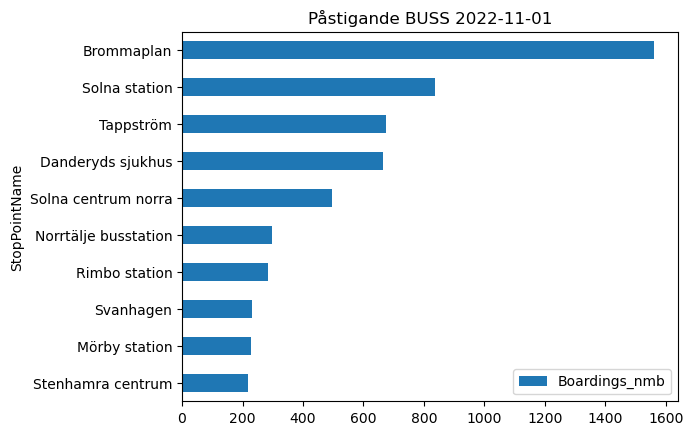

In [20]:
# Sort
df_bus.sort_values(by="Boardings_nmb",ascending=True).tail(10).plot.barh(x='StopPointName',y='Boardings_nmb', title="Påstigande BUSS 2022-11-01")

In [21]:
import plotly.express as px

In [22]:
df_bus.head()

StopPointName  Boardings_nmb  CentroidLat  CentroidLong  \
StopPointName                                                              
Alhamra                Alhamra            5.0    59.735269     18.281700   
Bergshamra bro  Bergshamra bro          156.0    59.380031     18.032826   
Betlehem              Betlehem            0.0    59.300293     17.809867   
Björkboda            Björkboda            0.0    59.737092     18.465879   
Björkholmen        Björkholmen            2.0    59.734322     18.440231   

                DepartureLineNumber  CalendarDateKey  \
StopPointName                                          
Alhamra                         677         20221101   
Bergshamra bro                  176         20221101   
Betlehem                        176         20221101   
Björkboda                       677         20221101   
Björkholmen                     677         20221101   

               DepartureLineTransportMode  
StopPointName                              
Alhamra                               BUS  
Bergshamra bro                        BUS  
Betlehem                              BUS  
Björkboda                             BUS  
Björkholmen                           BUS

In [23]:
# Mapbox Map
mapbox_access_token =  'pk.eyJ1IjoidWxsaXoiLCJhIjoiY2xpY3hha2QyMG42bDNnbW9mYms5bTUyMyJ9.6-FqgXfSBrO5TFNQVZDrzA'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_all, lat="CentroidLat", lon="CentroidLong", size='Boardings_nmb', text=df_all['StopPointName'], title="linje: 176, 677, 28, 40 - 2022-11-01", color=df_all['DepartureLineTransportMode'],labels={
                     "Boardings_nmb": "Påstigande",
                     "StopPointName": "Stoppställe",
                 }, 
                hover_data={ 'DepartureLineNumber':True, # add other column, default formatting 
                            },
                 
                 zoom=8)
fig.show()
fig.show(renderer="browser")

In [24]:
# df1 = df_apc_line.drop_duplicates(subset=["StopPointName"], keep="first")
# print(df1)